An Eigenfaces Session with python
==========
This session aims to demonstrate the use of scikit in python using an eigenfaces exercise. First will construct a class for storing the information of the chamber of representatives. Later we will import the image dataset, compute some descriptive statistics, perform an analysis of principal components, clustering analysis and finally will use a non-linear classifier to assess the gender from just the image of the representative. 

Diputado Class
-----
A diputado has a Name, Surnames, ID, Picture, Gender and Political Affiliation

Parlament class
-----
Let's define a very simple Parlament object, where we store the diputados objects. From this class, we have to be able to get information from the parlament.

In [1]:
class Parlament(object):
    def __init__(self):
        self.elements=[]
        self.inds=[]
        self.ndips=0
    def add(self, diputado):
        self.elements.append(diputado)
        self.inds.append(diputado.getInd())
        self.ndips +=1
    def getInds(self):
        return [self.elements[i].getInd() for i in range(self.ndips)]
    def len(self):
        return len(self.elements)
    def __getitem__(self, key):
        if isinstance(key, slice):
            indices = key.indices(self.ndips)
            return [self[ii] for ii in xrange(*key.indices(self.len()))] 
        else:
            return self.elements[key]
    def getName(self,key):
        return self.elements[key].getName()
        

In [2]:
%pylab inline
class Diputado(object):
    def __init__(self,ind,fileRoot="./"):
        self.name=""
        self.surname=""
        self.ind=ind
        self.picfile=""
        self.party=""
        self.gender=""
        self.fileRoot=fileRoot
        self.ext="c.jpg" 
    def setName(self,name):
        self.name=name
    def setSurname(self,surname):
        self.surname=surname
    def setParty(self,party):
        self.party=party
    def setGender(self,gender):
        self.gender=gender
    def getName(self):
        return self.name
    def getSurname(self):
        return self.surname
    def getInd(self):
        return self.ind
    def getPicfile(self):
        return self.fileRoot + str(self.ind) + self.ext
    def getParty(self):
        return self.party
    def getGender(self):
        return self.gender
       

Populating the interactive namespace from numpy and matplotlib


In [3]:
import csv
with open('db/index.csv','rb') as csvfile:
    r = csv.reader(csvfile, delimiter=';')
    r.next()
    p = Parlament()
    for row in r:
        n = Diputado(int(row[0]),"db/db/")
        n.setName(row[1].strip())
        n.setSurname(row[2].strip())
        n.setGender(row[3].strip())
        n.setParty(row[4].strip())
        p.add(n)


In [4]:
p.len()
p[0].getPicfile()

'db/db/321c.jpg'

Let's create a dataset of the analysis.


'Manuel|Mar\xc3\xadn Gonz\xc3\xa1lez|H'

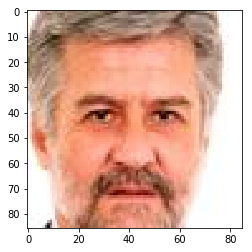

In [5]:
from scipy import ndimage,misc
import numpy as np
import matplotlib.pyplot as pl
I = ndimage.imread(p[0].getPicfile())
pl.imshow(I)
np.shape(I)
'|'.join([p[0].getName(), p[0].getSurname(), p[0].getGender()])

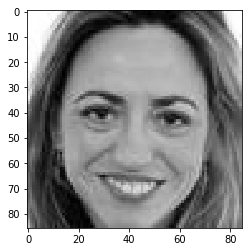

In [7]:
I = ndimage.imread(p[1].getPicfile(), flatten=1)
img=pl.imshow(I)
img.set_cmap('gray')
Is=shape(I)


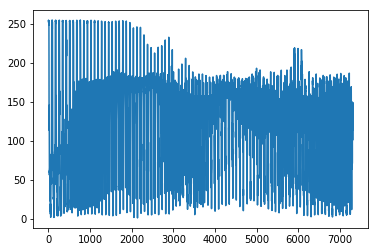

In [8]:
Iv = np.reshape(I,np.prod(Is))
pl.plot(Iv)

Let's stack all images to an array and create a couple of dependent variables.

In [9]:

X=np.array([ ndimage.imread(d.getPicfile(), flatten=1).ravel()
             for d in p])
shape(X)
Yg=np.array([ d.getGender() for d in p])
Yp=np.array([ d.getParty() for d in p])
Yp[0:5],Yg[0:5],shape(X)

(array(['GS', 'GS', 'GC-CiU', 'GP', 'GP'], 
       dtype='|S10'), array(['H', 'M', 'H', 'H', 'H'], 
       dtype='|S1'), (348, 7310))

Principal Component Analysis
=========
Let's apply a PCA analysis with a 5 components.

In [10]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
sX = preprocessing.scale(X)
ncomp=5
mod=PCA(n_components=ncomp)
mod.fit(sX)
ev = mod.explained_variance_ratio_
print(ev)

/usr/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


[ 0.21537453  0.08870521  0.07254971  0.05253381  0.04564397]


In [11]:
Xpca = mod.transform(sX)
Xpca[0:3,:]

array([[-35.67222074,   2.5693032 ,  13.03865317,  -7.54242115,
        -10.67793248],
       [ 55.11846798,  19.39879816, -26.91607072,  21.8787419 ,
         -6.68905488],
       [-36.31108192,   0.79105572,  -9.56686598,  20.49105089,
         -3.42447264]])

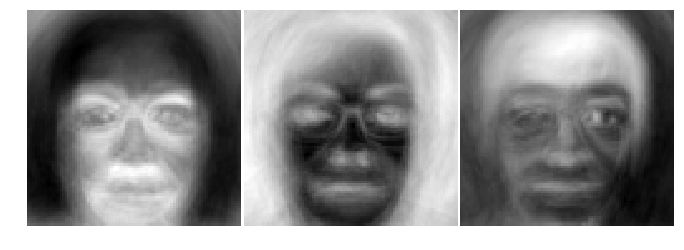

In [12]:
eigendips = mod.components_.reshape((ncomp, Is[0], Is[1]))

pl.figure(figsize=(9 ,3))

pl.subplot(131)
pl.imshow(eigendips[0], cmap=pl.cm.gray)
pl.axis('off')

pl.subplot(132)
pl.imshow(eigendips[1], cmap=pl.cm.gray)
pl.axis('off')

pl.subplot(133)
pl.imshow(-eigendips[2], cmap=pl.cm.gray)
pl.axis('off')

pl.subplots_adjust(wspace=0.01, hspace=0.01, top=1, bottom=0, left=0, right=1)
pl.show()

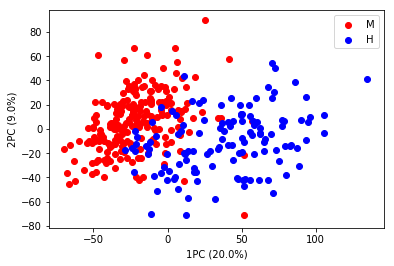

In [13]:
colors=['blue','red']
clut = dict(zip(['M','H'],['red','blue']))
""" for one shot plot cols=[ clut[i] for i in Yg]"""

pl.scatter(Xpca[np.where(Yg=='H'),0],Xpca[np.where(Yg=='H'),1],c='red')
pl.scatter(Xpca[np.where(Yg=='M'),0],Xpca[np.where(Yg=='M'),1],c='blue')
pl.legend(('M','H'))
pl.xlabel('1PC ('+ "%s" % float( "%2.1g" % (100*ev[0])) +"%)")
pl.ylabel('2PC ('+ "%s" % float( "%2.1g" % (100*ev[1])) +"%)")
pl.show()

Clustering
======= 
Let's try to find com similar pictures with a clustering algorithm. We will use the cluster class from sklearn.


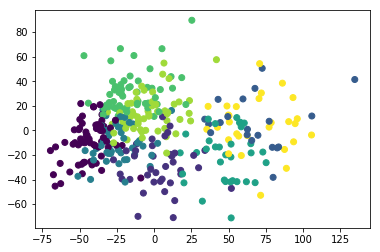

In [14]:
from sklearn import cluster

k_means =  cluster.KMeans(n_clusters=8,n_init=10)
k_means.fit(Xpca)

scatter(Xpca[:,0],Xpca[:,1],c=k_means.labels_.astype(np.float))

We can plot the samples that have been grouped within the same cluster. For doing so we have to reshape the vectors corresponding to each sample matching the original images. This is extremelly easy to do in python!

In [15]:

def plotg(g):
    indg = np.where(k_means.labels_ == g)
    nx = int(sqrt(shape(indg)[1]))+1
    ny = nx+1
    f = pl.figure()

    for e,i in enumerate(indg[0]):
        f.add_subplot(ny,nx,e+1)
        pl.imshow(X[i,:].reshape(Is), cmap=pl.cm.gray)
        pl.axis('off')
        pl.subplots_adjust(wspace=0, hspace=0,top=1, bottom=0, left=0, right=1)


[0 1 2 3 4 5 6 7]


(None, None)

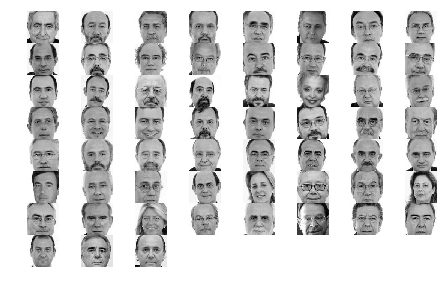

In [16]:
print(unique(k_means.labels_))
plotg(5), plotg(10)

Supervised Analysis
=======
Next, we will build two classifiers and will try to asses gender just from the feature vector (pixel intensities). We will test k-nn classifier and compare it with a Support Vector Classifier, trained with a grid search. We will also show how to use a cross-validation scheme provided by sklearn scipy toolkit.

In [17]:
nYg = np.array([ int(y=='H') for y in Yg])
print nYg[0:5]

[1 0 1 1 1]


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
k_fold = cross_validation.KFold(n=p.len(), n_folds=3)
scores = list()
for train_indices, test_indices in k_fold:
    Xtrain = X[train_indices,:]
    Ytrain = nYg[train_indices]
    Xval = X[test_indices,:]
    Yval = nYg[test_indices]
    knn = KNeighborsClassifier()
    knn.fit(Xtrain,Ytrain)
    scores.append(knn.score(Xval,Yval))
    
print scores

/usr/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0.81896551724137934, 0.89655172413793105, 0.90517241379310343]


In [19]:
[knn.fit(X[train,:], nYg[train]).score(X[test,:], nYg[test]) 
    for train, test in k_fold]

[0.81896551724137934, 0.89655172413793105, 0.90517241379310343]

In [20]:
from sklearn import svm
svc = svm.SVC(C=1, kernel='linear')
[svc.fit(X[train,:], nYg[train]).score(X[test,:], nYg[test]) 
    for train, test in k_fold]

[0.84482758620689657, 0.89655172413793105, 0.89655172413793105]

In [21]:
from sklearn import svm
from sklearn import  model_selection

F = model_selection.StratifiedKFold(n_splits=10)

p1 = svm.SVC(C=1, kernel='linear')
p2 = svm.SVC(C=1, kernel='rbf',gamma=1)
p3 = svm.SVC(C=20, kernel='rbf',gamma=0.1)
def kf(p):
    return [p.fit(X[train,:], Yg[train]).score(X[test,:], Yg[test]) 
    for train, test in F.split(X,Yg)]

O = np.array([kf(p) for p in [p1,p2,p3]])


In [22]:
print(O.mean(axis=1))
print(O.std(axis=1))


[ 0.89103175  0.64091036  0.64091036]
[ 0.04351854  0.00711179  0.00711179]


In [23]:
from sklearn.grid_search import GridSearchCV
gammas = np.logspace(-6, -1, 5)
clf = GridSearchCV(estimator=svc, param_grid=dict(gamma=gammas), n_jobs=-1)
clf.fit(X[train,:], nYg[train]) 
print clf.best_score_
print clf.best_estimator_.gamma
print clf.score(X[test,:], nYg[test])

/usr/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.905172413793
1e-06
0.896551724138


In [24]:
from sklearn.metrics import classification_report
ypred = clf.predict(X[test,:])
ytest = nYg[test]
ygtest = Yg[test]
print classification_report(ytest, ypred, target_names=['H','M'])

             precision    recall  f1-score   support

          H       0.84      0.84      0.84        37
          M       0.92      0.92      0.92        79

avg / total       0.90      0.90      0.90       116



In [25]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(ytest, ypred)

[[31  6]
 [ 6 73]]


Final Assignment
======= 

Please deliver a ipython notebook containing: 

- reformat validation images (your class mates) to be used with this dataset
- Compute a PCA score plot of your class mates
- Solve a clustering algorithm with your class images
- Build and tune a gender predictor for your class mates training with the provided images (chamber of representatives) 
- Can you discriminate between a class mate and a member of the chamber of representatives?
- Provide metrics for both cases
- Could you characterize the solutions given by NonNegative Matrix Manipulation?

